# Investigating Earnings Based On College Majors

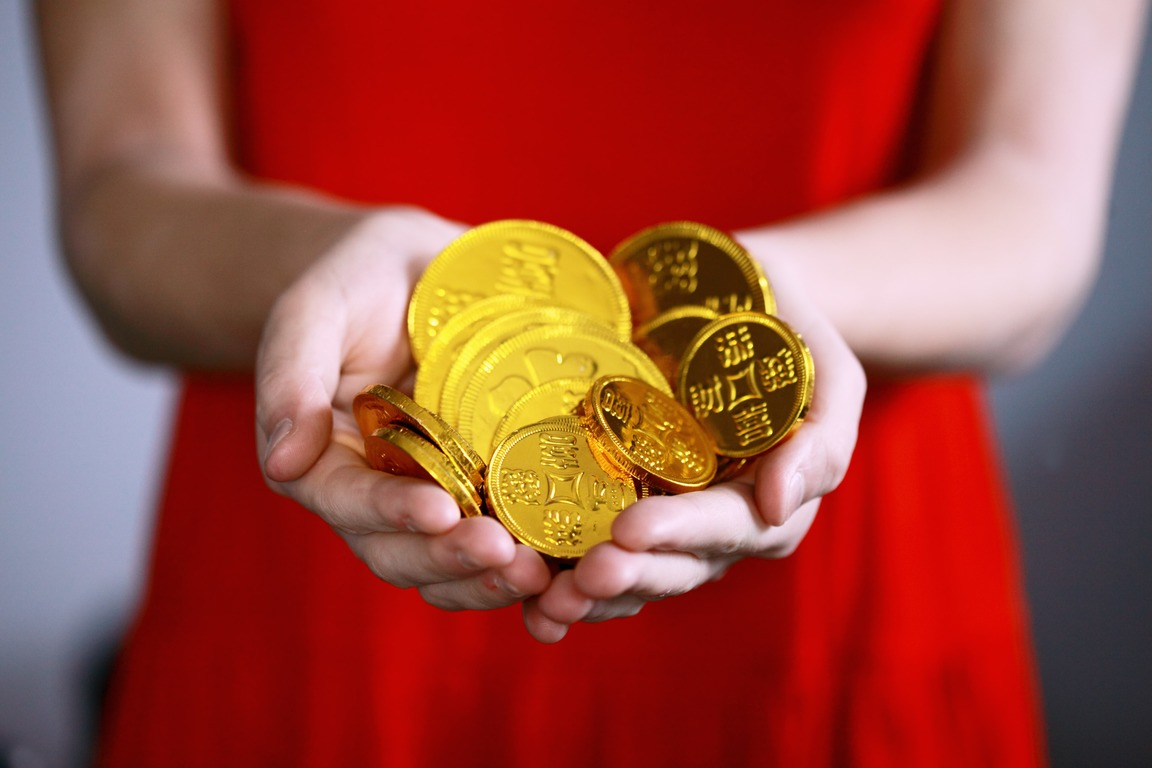

## Introduction

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors), where we can find also the description of the dataset columns.

The aim of this project is to explore the dataset by means of various kinds of visualizations and find the answers to the following questions:
- What is the range of typical salaries in the USA?
- Do students in more popular majors make more money?
- Do students that majored in predominantly female subjects make less money?
- Which major categories are more popular among men/women?
- Is the unemployment rate higher for low-ranked majors?

### Summary of Results
- ***What is the range of typical salaries in the USA?*** 30-45K USD per year.
- ***Do students in more popular majors make more money?*** It depends on the reason why a certain major is popular or not: being in-demand on the modern market or not, difficult to learn and to be accepted to the university or not.
- ***Do students that majored in predominantly female subjects make less money?*** Yes.
- ***Which major categories are more popular among men/women?***
    - The most popular category for both men and women is *Business*, the least – *Interdisciplinary* followed by *Agriculture & Natural Resources*.
    - The category with almost equal numbers of men and women is *Law & Public Policy*.
    - The most male category is *Engineering*, the most female – *Education*.
- ***Is the unemployment rate higher for low-ranked majors?*** An overall trend is that high-ranked majors tend to have a lower unemployment rate. 

## Data Downloading, Initial Exploration, and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(f'\033[1mNumber of rows:   \033[0m {recent_grads.shape[0]:,}\n'
      f'\033[1mNumber of columns:\033[0m {recent_grads.shape[1]}\n\n'
      f'\033[1mTOP5 majors:\033[0m\n'
      f"{recent_grads['Major'].head()}\n\n"
      f'\033[1mBOTTOM5 majors:\033[0m\n'
      f"{recent_grads['Major'].tail()}\n\n"
      f'\033[1mMissing values by column:\033[0m\n'
      f'{recent_grads.isnull().sum()}')

Number of rows:    173
Number of columns: 21

TOP5 majors:
0                        PETROLEUM ENGINEERING
1               MINING AND MINERAL ENGINEERING
2                    METALLURGICAL ENGINEERING
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                         CHEMICAL ENGINEERING
Name: Major, dtype: object

BOTTOM5 majors:
168                   ZOOLOGY
169    EDUCATIONAL PSYCHOLOGY
170       CLINICAL PSYCHOLOGY
171     COUNSELING PSYCHOLOGY
172           LIBRARY SCIENCE
Name: Major, dtype: object

Missing values by column:
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th           

We can make the following observations:
- Among the 173 majors, the top-ranked one is *PETROLEUM ENGINEERING*, the bottom-ranked – *LIBRARY SCIENCE*.
- In general, engineering majors tend to be top-ranked.
- A few columns contain a missing value that has to be dropped:

In [2]:
recent_grads = recent_grads.dropna()
print(f'\033[1mNumber of rows:\033[0m {recent_grads.shape[0]:,}\n')

Number of rows: 172



Only 1 row had missing values in some columns, and it was dropped from the dataset.

Now, let's use different data visualization techniques to answer the questions stated in the introduction. 
## What is the range of typical salaries in the USA?
Before we start our analysis, it's important to note a couple of things:
- The data is related only to the period from 2010 to 2012 and only to the USA.
- The ranking is based purely on **median earnings**, and not on a combination of factors. It's clearly stated in the [documentation](https://github.com/fivethirtyeight/data/tree/master/college-majors), and we can easily double-check that when the rank increases, the salary decreases:

In [3]:
recent_grads['Median'].is_monotonic_decreasing

True

Let's start with exploring an overall median salary distribution:

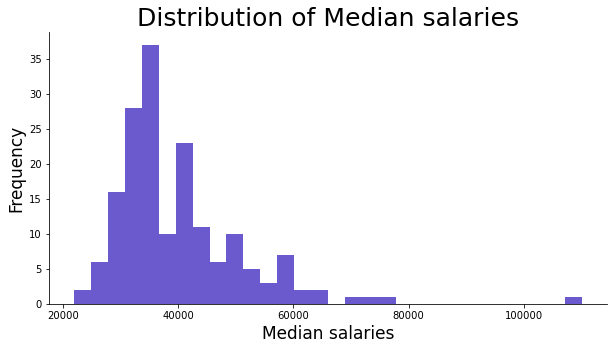

In [4]:
def create_hist(column, xlabel_string, bins=10, x_start=None, x_end=None):
    plt.figure(figsize=(10,5))
    plt.hist(recent_grads[column], bins=bins, color='slateblue')
    plt.title(f'Distribution of {xlabel_string}', fontsize=25)
    plt.xlabel(f'{xlabel_string}', fontsize=17)
    plt.ylabel('Frequency', fontsize=17)
    plt.xlim(x_start, x_end)
    sns.despine()
    
create_hist(column='Median', xlabel_string='Median salaries', bins=30)

We immediately see an evident outlier of a median salary higher than 100K USD, with a big gap of around 30K USD from all the next one. This is the top-ranked major *PETROLEUM ENGINEERING*. Let's hide it from the histogram to better see the distribution of the other values:

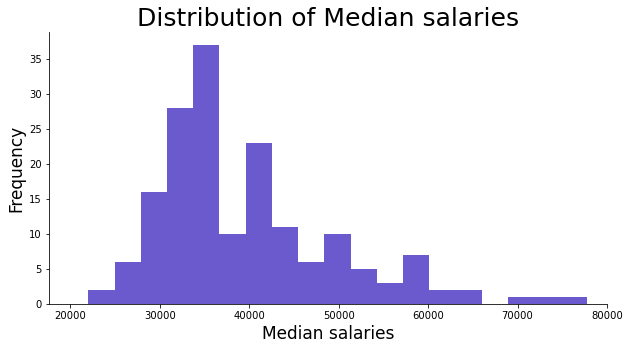

In [5]:
create_hist(column='Median', xlabel_string='Median salaries', bins=30, x_end=80000)

The distribution is multimodal and strongly right-skewed meaning that fewer majors have high salaries. We can roughly estimate that around 60% of majors have a median salary in the range of 30-45K USD per year. 

Let's take a more granular look at the distribution of median salaries (without the previously detected outlier related to *PETROLEUM ENGINEERING*):

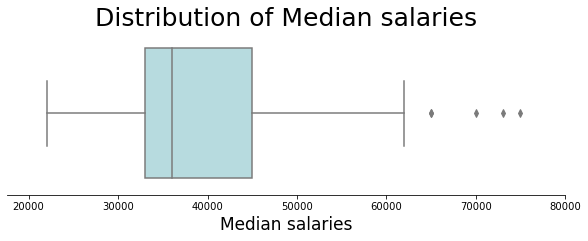

In [6]:
def create_boxplot(column, xlabel_string, x_start=None, x_end=None):
    plt.figure(figsize=(10,3))
    sns.boxplot(x=column, data=recent_grads, color='powderblue')
    plt.title(f'Distribution of {xlabel_string}', fontsize=25)
    plt.xlabel(f'{xlabel_string}', fontsize=17)
    plt.ylabel(None)
    plt.yticks([])
    plt.xlim(x_start, x_end)
    sns.despine(left=True)

create_boxplot(column='Median', xlabel_string='Median salaries', x_end=80000)

The plot above reveals 4 more outliers with a very high median salary. Practically, since the ranking is based purely on median salaries, here we have the same TOP5 majors (including the hidden *PETROLEUM ENGINEERING*) that we saw earlier:

In [7]:
recent_grads[['Major', 'Median']].head()

,Major,Median
0,PETROLEUM ENGINEERING,110000
1,MINING AND MINERAL ENGINEERING,75000
2,METALLURGICAL ENGINEERING,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
4,CHEMICAL ENGINEERING,65000


Some more observations from the plot above:
- The bottom 25% of the median salaries range from 22 to 33K USD.
- The top 25% of the median salaries range from 45 to 62K USD.
- The median of the median salaries is 36K USD.

Apart from the visual representation, we can obtain these values directly:

In [8]:
# Calculating quantiles
print(recent_grads['Median'].quantile([0.25, 0.5, 0.75]))

# Calculating whiskers
_, bp = pd.DataFrame.boxplot(recent_grads['Median'], return_type='both')
print(f"\nWhiskers: {[whiskers.get_ydata() for whiskers in bp['whiskers']]}")
plt.clf()

0.25    33000.0
0.50    36000.0
0.75    45000.0
Name: Median, dtype: float64

Whiskers: [array([33000., 22000.]), array([45000., 62000.])]


<Figure size 432x288 with 0 Axes>

## Do students in more popular majors make more money?
By "more popular majors", we'll mean the majors where a high number of people graduated. Let's plot the total number of people with each major vs. median salaries:

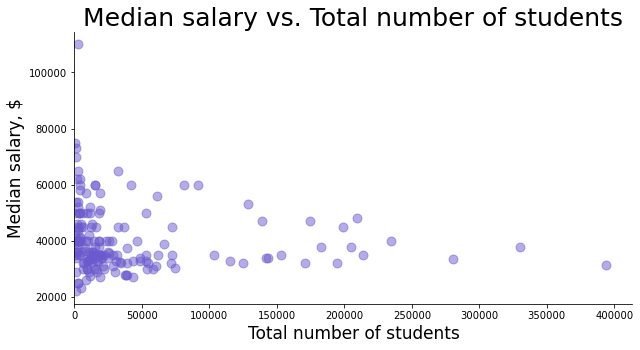

In [9]:
def create_scatter_plot(column, xlabel_string, x_end=None):
    plt.figure(figsize=(10,5))
    plt.scatter(recent_grads[column], recent_grads['Median'], color='slateblue', alpha=0.5, s=80)
    plt.title(f'Median salary vs. {xlabel_string}', fontsize=25)
    plt.xlabel(f'{xlabel_string}', fontsize=17)
    plt.ylabel('Median salary, $', fontsize=17)
    plt.xlim(0, x_end)
    sns.despine()

create_scatter_plot(column='Total', xlabel_string='Total number of students')

In [10]:
recent_grads[recent_grads['Total']>250000][['Major', 'Median']]

,Major,Median
76,BUSINESS MANAGEMENT AND ADMINISTRATION,38000
123,BIOLOGY,33400
145,PSYCHOLOGY,31500


While for the *BUSINESS MANAGEMENT AND ADMINISTRATION* major, the popularity is explainable, the other two results look a bit unexpected. Anyway, let's hide these outliers from our plot and explore the rest of the values:

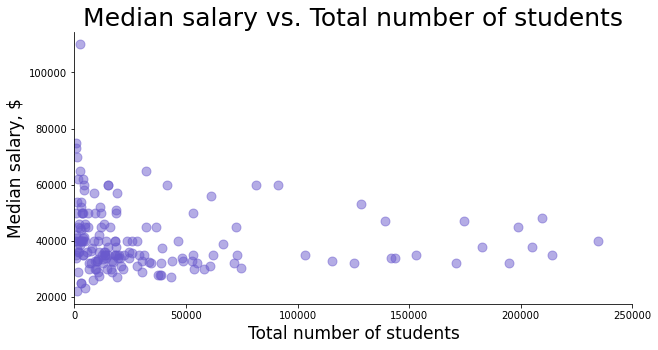

In [11]:
create_scatter_plot(column='Total', xlabel_string='Total number of students', x_end=250000)

At first glance, it seems that there is no particular relationship between the total number of people with a major and the median salary. One evident thing here is that the data of the `Total` column is strongly right-skewed: towards smaller values of `Total`, the number of majors rapidly increases. We can see this trend on a histogram for this variable:

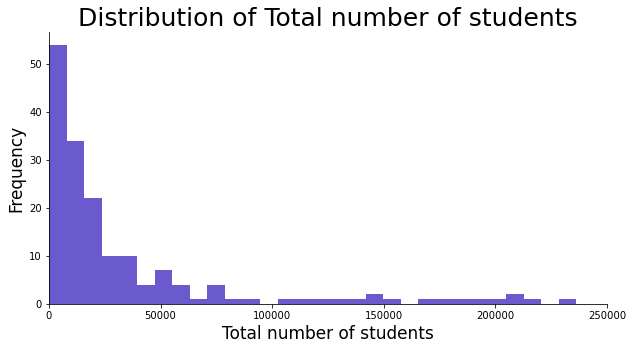

In [12]:
create_hist(column='Total', xlabel_string='Total number of students', 
            bins=50, x_start=0, x_end=250000)

and, especially, on a boxplot:

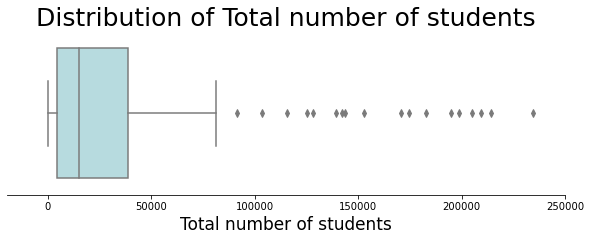

In [13]:
create_boxplot(column='Total', xlabel_string='Total number of students', x_end=250000)

Now we can say that all those ultra-popular majors (more than 90K people) are actually outliers. However, we also remember from the scatter plot above that some of them have rather high median salaries. Let's take a look at them:

In [14]:
recent_grads[(recent_grads['Total']>90000)&(recent_grads['Median']>45000)][['Major', 'Median']]

,Major,Median
8,MECHANICAL ENGINEERING,60000
20,COMPUTER SCIENCE,53000
34,NURSING,48000
35,FINANCE,47000
36,ECONOMICS,47000


The majors *MECHANICAL ENGINEERING*, *COMPUTER SCIENCE*, *FINANCE*, and *ECONOMICS* look plausible for being very popular, in-demand on the modern market, and, consequently, well-paid. Instead, the *NURSING* major, being both popular and well-paid, seems surprising. Anyway, now that we found all the outliers, let's return to the scatter plot above and hide also them:

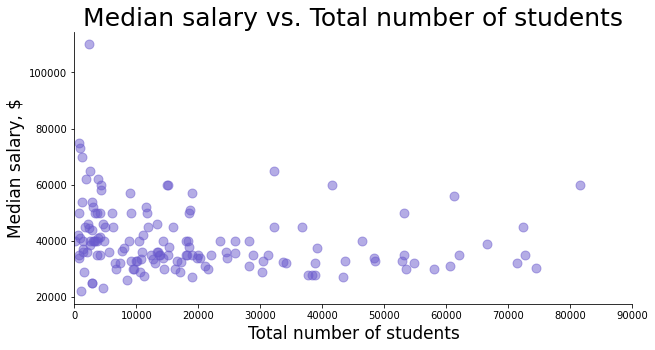

In [15]:
create_scatter_plot(column='Total', xlabel_string='Total number of students', x_end=90000)

We see that the variance of median salaries increases with decreasing the total number of people with a major. Let's narrow the range once again looking only at the values smaller than 40K people (i.e., the densest part of the graph):

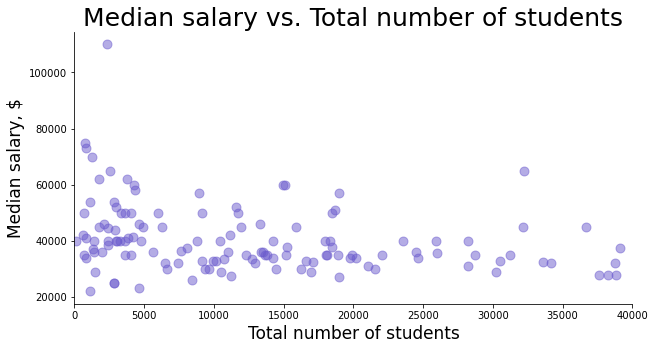

In [16]:
create_scatter_plot(column='Total', xlabel_string='Total number of students', x_end=40000)

Now the variance of median salaries for smaller numbers of people is more prominent. There is some reasoning for it. Some majors attract few students exactly because of their low popularity at the market (like the above-mentioned *LIBRARY SCIENCE*). Obviously, the salaries for such jobs will be low. On the other hand, some other majors are not a common choice because they are difficult to learn and have more strict acceptance requirements and prerequisites. As a result, these niches heavily lack specialists, which leads to high salaries. With the increase of `Total`, we observe some local splashes of median salaries. However, a general tendency is that the median salaries decrease. It seems logical: the more people with the same profession (except for those that are currently in very high demand), the lower the median salary.
## Do students that majored in predominantly female subjects make less money?
To start with, let's take a look at the distribution of the female student fraction in the whole dataset:

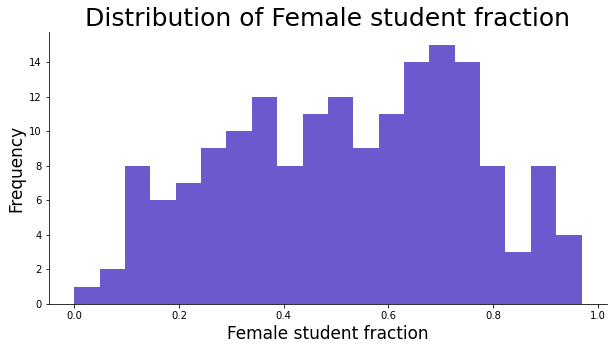

In [17]:
create_hist(column='ShareWomen', xlabel_string='Female student fraction', bins=20)

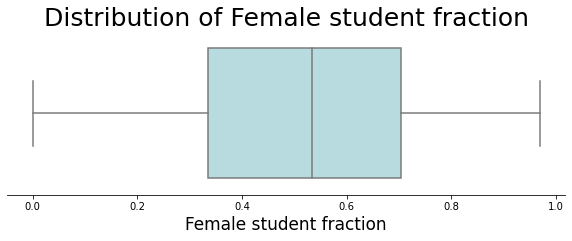

In [18]:
create_boxplot(column='ShareWomen', xlabel_string='Female student fraction')

From both plots, we can say that there are more majors where the fraction of female students is slightly higher than 50%, but the difference isn't significant.

Now, let's see if there is any relation between the fraction of female students and median salary:

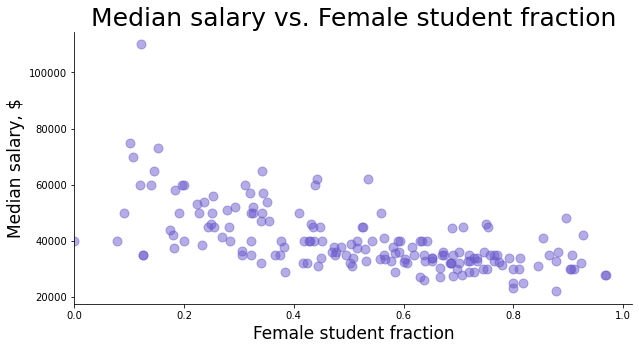

In [19]:
create_scatter_plot(column='ShareWomen', xlabel_string='Female student fraction')

We observe a negative correlation between the fraction of female students and median salaries. This correlation becomes even more obvious if we hide the outlier for the *PETROLEUM ENGINEERING* major (historically dominated by men and demonstrating a very high median salary) and visualize the result as a hexagonal bin plot to reduce overplotting:

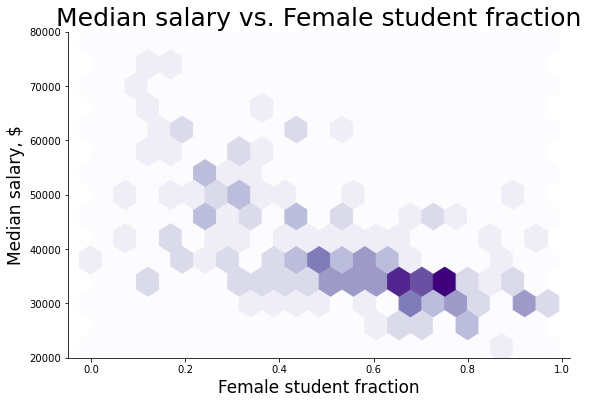

In [20]:
plt.figure(figsize=(9,6))
plt.hexbin(recent_grads['ShareWomen'], recent_grads['Median'], gridsize=20, cmap='Purples')
plt.ylim(20000, 80000)
plt.title('Median salary vs. Female student fraction', fontsize=25)
plt.xlabel('Female student fraction', fontsize=17)
plt.ylabel('Median salary, $', fontsize=17)
sns.despine()

We can confirm this tendency looking at it from another angle, namely, visualizing the female student fraction for the TOP5 and BOTOM5 majors (keeping in mind that rank is proportional to median salary):

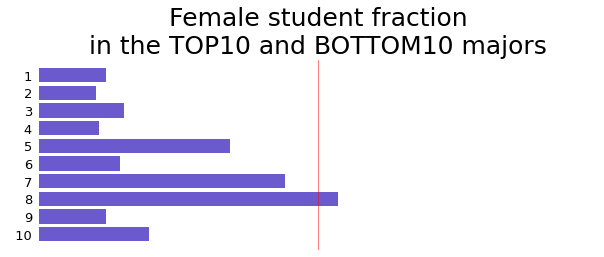

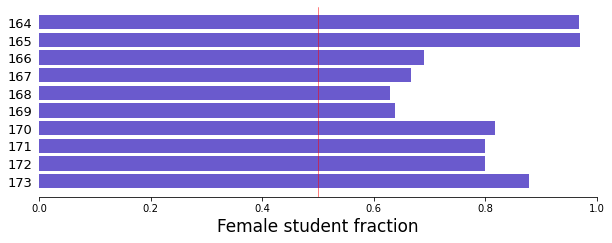

In [21]:
def create_bar_plot(column, title, xlabel, xlim=1, vline=0.5):
    plt.subplots(1, figsize=(10,3.5))
    column_reversed = recent_grads[:10][column][::-1]
    plt.barh(recent_grads[:10]['Rank'], column_reversed, color='slateblue')
    plt.title(f'{title}', fontsize=25)
    plt.xticks([])
    plt.yticks(ticks=recent_grads[:10]['Rank'], labels=['  10', 9,8,7,6,5,4,3,2,1], fontsize=13)
    plt.xlim(0, xlim)
    plt.tick_params(left=False, bottom=False)
    plt.axvline(vline, color='red', linewidth=0.5)
    sns.despine(left=True, bottom=True)
    plt.subplots(2, figsize=(10,3.5))
    plt.clf()
    ranks_reversed = recent_grads[-10:]['Rank'][::-1]
    column_reversed = recent_grads[-10:][column][::-1]
    plt.barh(recent_grads[-10:]['Rank'], column_reversed, color='slateblue')
    plt.xlabel(f'{xlabel}', fontsize=17)
    plt.yticks(ticks=recent_grads[-10:]['Rank'], labels=ranks_reversed, fontsize=13)
    plt.xlim(0, xlim)
    plt.tick_params(left=False)
    plt.axvline(vline, color='red', linewidth=0.5)
    sns.despine(left=True)

create_bar_plot(column='ShareWomen', title='Female student fraction\nin the TOP10 and BOTTOM10 majors',
                xlabel='Female student fraction')

The TOP5 majors, with the highest median salary, are evidently dominated by men (up to 90%), except for the major ranked 8 demonstrating a slight domination of female students:

In [22]:
recent_grads[recent_grads['Rank']==8]['Major'].squeeze()

'ASTRONOMY AND ASTROPHYSICS'

The BOTTOM5 majors, with the lowest median salary, are strongly dominated by women (60% and more).
## Which major categories are more popular among men/women?

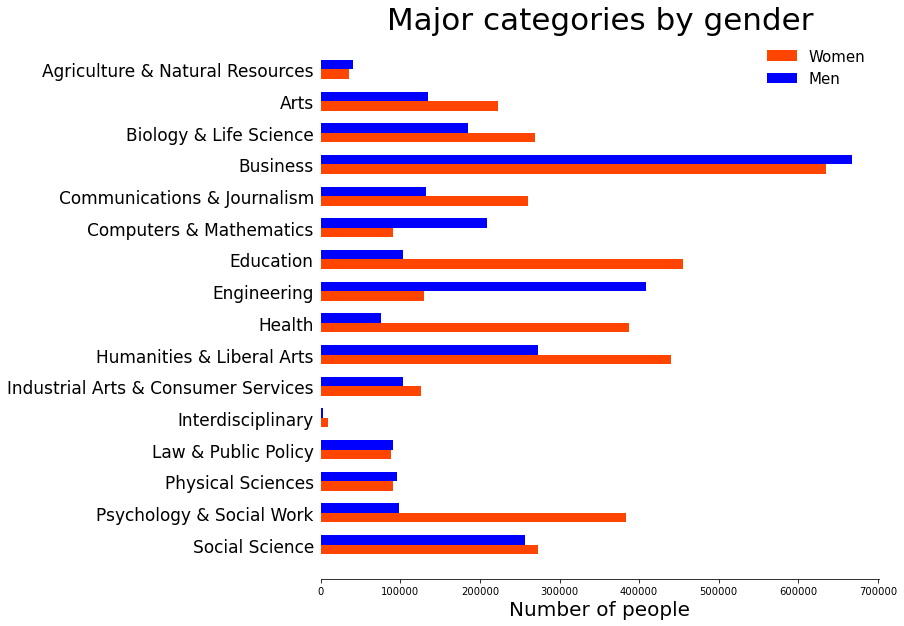

In [23]:
plt.figure(figsize=(10,10))
majors_by_gender = recent_grads.groupby('Major_category')[['Men', 'Women']].agg('sum')
x = np.arange(len(majors_by_gender))
width = 0.3
plt.barh(x, majors_by_gender['Women'][::-1], width, color='orangered', label='Women')
plt.barh(x + width, majors_by_gender['Men'][::-1], width, color='blue', label='Men')
plt.title('Major categories by gender', fontsize=31)
plt.xlabel('Number of people', fontsize=20)
plt.yticks(x + width/2, majors_by_gender.index[::-1], fontsize=17)
plt.tick_params(bottom=True, left=False)
plt.legend(loc='upper right', frameon=False, fontsize=15)
sns.despine(left=True)

We can make the following observations here:
- The most popular category for both men and women is *Business*, the least – *Interdisciplinary* followed by *Agriculture & Natural Resources*.
-  The category with almost equal numbers of men and women is *Law & Public Policy* followed by *Physical Sciences* and *Agriculture & Natural Resources*.
- The most male category is *Engineering* followed by *Computers & Mathematics*.
- The most female category is *Education* followed by *Health* and *Psychology & Social Work*.

## Is the unemployment rate higher for low-ranked majors?
Let's first take a look at the distribution of the unemployment rate in the whole dataset:

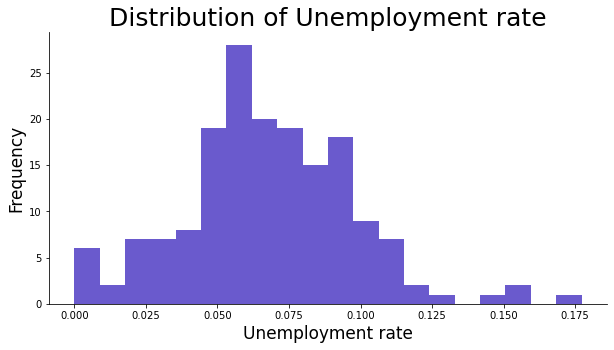

In [24]:
create_hist(column='Unemployment_rate', xlabel_string='Unemployment rate', bins=20)

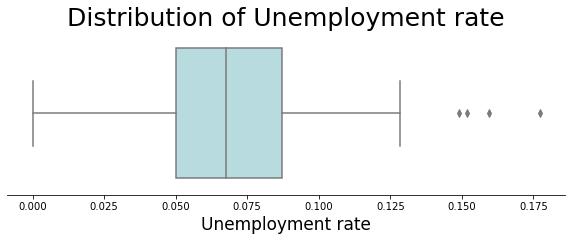

In [25]:
create_boxplot(column='Unemployment_rate', xlabel_string='Unemployment rate')

For half of the majors, the unemployment rate ranges from 5 to 9%, with the median value of 7%, while for 4 majors, we observe anomalously high values (>13%). Let's take a look at those 4 majors:

In [26]:
recent_grads[recent_grads['Unemployment_rate']>0.13][['Major', 'Unemployment_rate']]

,Major,Unemployment_rate
5,NUCLEAR ENGINEERING,0.177226
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.151850
89,PUBLIC ADMINISTRATION,0.159491
170,CLINICAL PSYCHOLOGY,0.149048


Let's check if there is any relation between the unemployment rate and median salary:

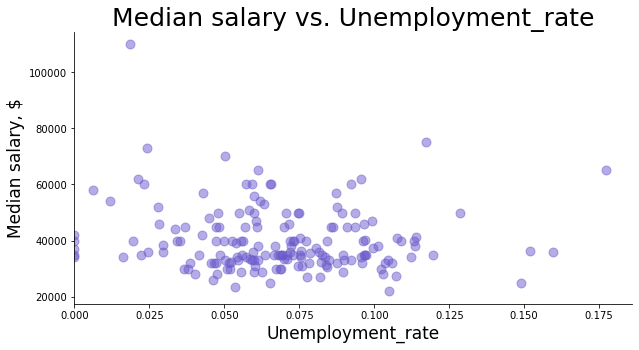

In [27]:
create_scatter_plot(column='Unemployment_rate', xlabel_string='Unemployment_rate')

We can make the following observations here:
- Among the above-mentioned 4 outliers, the *NUCLEAR ENGINEERING* major (the one with the highest unemployment rate) shows a rather high median salary, while *CLINICAL PSYCHOLOGY* has one of the lowest values of the median salary in the whole dataset.
- The top-ranked major *PETROLEUM ENGINEERING* demonstrates a rather low unemployment rate.
- There are 5 majors with a zero unemployment rate, all with the median salaries from the average range (30-45K USD):

In [28]:
recent_grads[recent_grads['Unemployment_rate']==0][['Major', 'Unemployment_rate']]

,Major,Unemployment_rate
52,MATHEMATICS AND COMPUTER SCIENCE,0.0
73,MILITARY TECHNOLOGIES,0.0
83,BOTANY,0.0
112,SOIL SCIENCE,0.0
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.0


Finally, to  answer our question for this section (*Is the unemployment rate higher for low-ranked majors?*), let's do the same exercise as we did earlier for female student fraction, i.e. compare the TOP10 and BOTTOM10 majors by their unemployment rates:

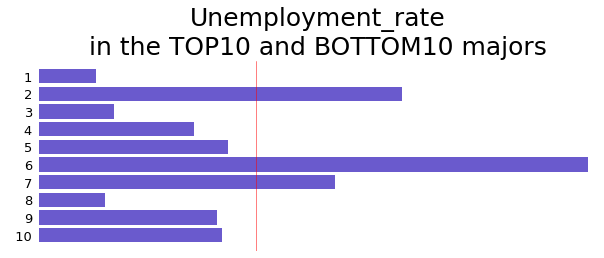

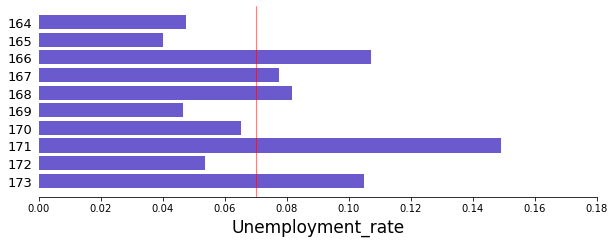

In [29]:
create_bar_plot(column='Unemployment_rate', title='Unemployment_rate\nin the TOP10 and BOTTOM10 majors',
                xlabel='Unemployment_rate', xlim=0.18, vline=0.07) 

In this case, the relation is not so obvious as it was for the female student fraction. For example, among the TOP10, we see the *NUCLEAR ENGINEERING* major (rank 6), which, as we already know, is also characterized by the highest unemployment rate. Also, the second-ranked major (*MINING AND MINERAL ENGINEERING*) demonstrates a very high value of unemployment rate. Anyway, as for an overall trend, we can observe that the high-ranked majors tend to have a lower unemployment rate: 
- only 3 out of the TOP10 show the values higher than the median value of the unemployment rate (7%, the red line on the plot), 
- 3 out of the TOP10, including the top-ranked major, have values lower than 3%.

Interesting that among the BOTOM10 majors, we see also *CLINICAL PSYCHOLOGY*, one of the above-discussed outliers. Having one of the lowest median salaries, as well as one of the highest unemployment rates, it seems to be quite an insecure choice for the students.
## Conclusion
In this project, we've analyzed a dataset on the job outcomes of students with different majors and explored relations between different variables. Below are the answers to the questions that we stated in the introduction:

***What is the range of typical salaries in the USA?***
- 30-45K USD per year.

***Do students in more popular majors make more money?***
- It depends. The most popular majors (*BUSINESS MANAGEMENT AND ADMINISTRATION*, *MECHANICAL ENGINEERING*, *COMPUTER SCIENCE*, *FINANCE*, *ECONOMICS*) are usually in-demand on the modern market, and, hence, they ensure decent-to-high median salaries. The least popular majors are so for 2 reasons: or they are not popular at the market (like *LIBRARY SCIENCE*) and, hence, low-paid, or they are difficult to learn or even being accepted to the university (like *PETROLEUM ENGINEERING*) and, hence, very well-paid because of a lack of specialists.

***Do students that majored in predominantly female subjects make less money?***
- Yes, there is a negative correlation between the fraction of female students and median salary.

***Which major categories are more popular among men/women?***
- The most popular category for both men and women is *Business*, the least – *Interdisciplinary* followed by *Agriculture & Natural Resources*.
- The category with almost equal numbers of men and women is *Law & Public Policy* followed by *Physical Sciences* and *Agriculture & Natural Resources*.
- The most male category is *Engineering* followed by *Computers & Mathematics*.
- The most female category is *Education* followed by *Health* and *Psychology & Social Work*.

***Is the unemployment rate higher for low-ranked majors?***
- Even though the relation is not so obvious, an overall trend is that high-ranked majors tend to have a lower unemployment rate. 